In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
def d1(x1, x2):
    M = 7; N = 2; P = -1
    return M * x2 + N * x1 + P

def d2(x1, x2):
    Q = 4; R = -6; S = 5
    return Q * x2 + R * x1 + S

def d3(x1, x2):
    V = -1; W = -1; Z = -2
    return V * x2 + W * x1 + Z

In [14]:
rMin = -5; rMax = 5; step = 0.1
t = np.arange(rMin, rMax, step)

x1, x2 = np.meshgrid(t, t)

In [15]:
x1.shape

(100, 100)

In [8]:
def classify(x1, x2):
    res = np.zeros(shape=(x1.shape[0], x2.shape[0]))
    
    c1 = np.logical_and(d1(x1, x2) > 0 , d2(x1, x2) < 0 , d3(x1, x2) < 0)
    
    c2 = np.logical_and(d1(x1, x2) < 0 , d2(x1, x2) > 0 , d3(x1, x2) < 0)
    
    c3 = np.logical_and(d1(x1, x2) < 0 , d2(x1, x2) < 0 , d3(x1, x2) > 0)
    
#     c1 = d1(x1, x2) > 0
#     c2 = d2(x1, x2) > 0
#     c3 = d3(x1, x2) > 0
    
    res[c1 == True] = 1
    res[c2 == True] = 2
    res[c3 == True] = 3
    
    return res
    

In [9]:
from matplotlib.cm import gist_rainbow
import matplotlib.patches as mpatches

In [11]:
ff= classify(x1, -x2)

In [13]:
ff.shape

(100, 100)

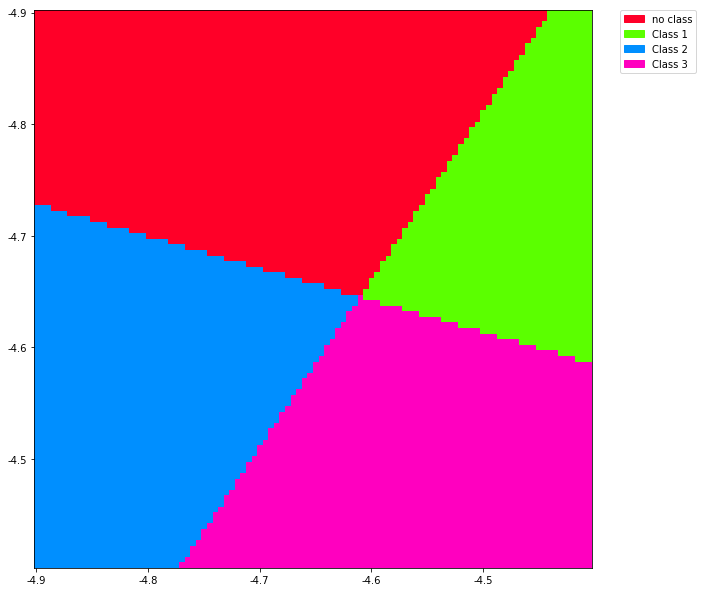

In [10]:
fig = plt.figure(figsize=(10,15),facecolor='w') 


ax = fig.add_subplot(111)
im = ax.imshow(classify(x1, -x2), cmap=gist_rainbow)

values = [0, 1, 2, 3]
classes = ['no class', 'Class 1', 'Class 2', 'Class 3']

colors = [ im.cmap(im.norm(value)) for value in values]

patches = [ mpatches.Patch(color=colors[i], label=classes[i] ) for i in range(len(values)) ]

plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

ax.set_xticklabels(np.round(t, 2));
ax.set_yticklabels(np.round(t, 2));
